In [1]:
# Import Functions
import numpy as np
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
from useful_functions import data_compiler

# Compile Data from all times

/glade/u/home/acheung/.conda/envs/snowflakes/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)

KeyboardInterrupt



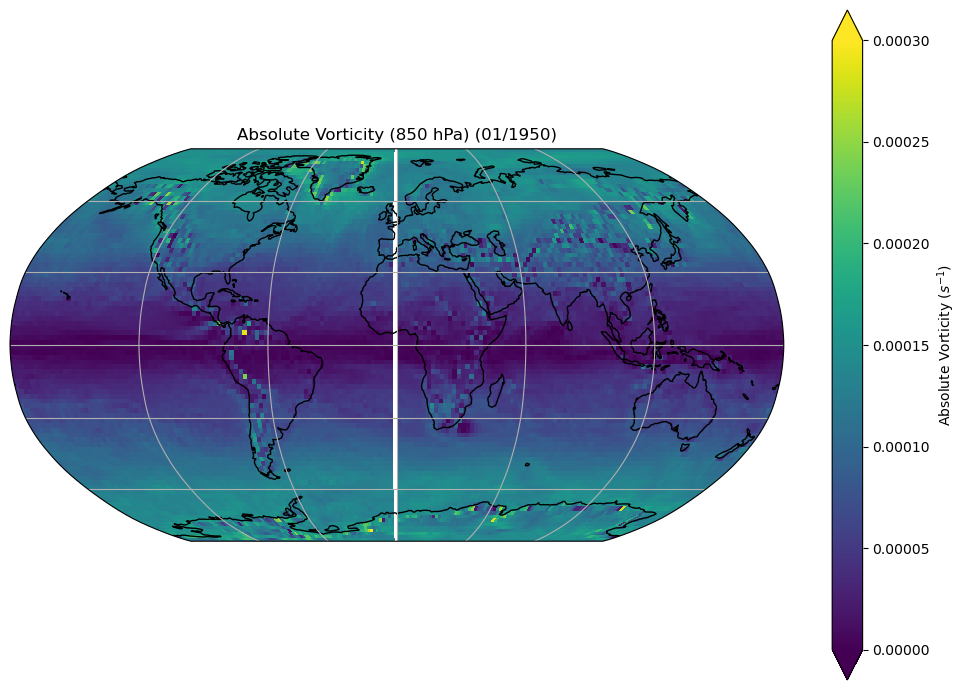

In [2]:
vars_list = os.listdir("/glade/work/acheung/TC_Genesis") # Determine Variables
# varinput = input('Enter Number (1. Absolute Vorticity at 850 hPa, 2. Column Relative Humidity, 3. Vertical Shear, 5. Potential Intensity, 6. Saturation Deficit): ')

inputarray = np.asarray(range(0,5))
inputarray = np.concatenate([inputarray[0:3],inputarray[-2:] + 1]) + 1
for varinput in inputarray:

    # Variable Names (neat)
    strofvarnames = ['Absolute Vorticity (850 hPa)', 'Column Relative Humidity', 'Vertical Shear','Mistake', 'Potential Intensity', 'Saturation Deficit']

    # Index of variable chosen
    varchosen = strofvarnames[int(varinput) - 1]
    vardesired = vars_list[int(varinput) - 1]

    # Compile Data for a Variable for all timesteps (including years and coordinates)
    Varcompiled, YearList, lons, lats = data_compiler(vardesired) 
    lonsmeshed, latsmeshed = np.meshgrid(lons, lats)

    # Variable Names for Directory Use
    strofvardirnames = ['Absolute_Vorticity_850_hPa', 'Column_Relative_Humidity', 'Vertical_Shear','Mistake', 'Potential_Intensity', 'Saturation_Deficit']

    # Legend Units
    stroflegendunits = ['Absolute Vorticity ($s^{-1}$)','Relative Humidity (Fractional)','Vertical Shear (m $s^{-1}$)','Mistake','Potential Intensity (m $s^{-1}$)','Saturation Deficit (g $kg^{-1}$)']

    # Set Minimum and Maximum ranges for pcolormesh plot

    if int(varinput) == 1: # Absolute Vorticity (850 hPa)
        minrange = 0
        maxrange = 0.0003
        cmapdesired = 'viridis'

    elif int(varinput) == 2:
        minrange = 0.4
        maxrange = 1
        cmapdesired = 'YlGn'

    elif int(varinput) == 3:
        minrange = 0
        maxrange = 50
        cmapdesired = 'viridis'
    elif int(varinput) == 5:
        minrange = 0
        maxrange = 110
        cmapdesired = 'viridis'
    elif int(varinput) == 6:
        minrange = -60
        maxrange = 0
        cmapdesired = 'YlGn'

    # Create Plots in Loop
    month = range(0,12) # Index of month to be selected

    for currentmonth in month: # Loop of current month (Sorted by month)
        for yearstep in range(0,Varcompiled.shape[0]): # Loop of current year
            fig = plt.figure(figsize=(10,7))
            varcurrent = Varcompiled[yearstep,:,:,currentmonth] # Call compiled data at specific month and year

            if int(varinput) == 1: # I took the absolute value of the entire matrix.... NOTE that we could also just multiple SH by -1... To be tested later...
                varcurrent = np.absolute(varcurrent)

            # Create cartopy plot
            ax = plt.axes(projection=ccrs.Robinson())
            ax.set_global()
            contourmap = ax.pcolormesh(lonsmeshed, latsmeshed, varcurrent, transform=ccrs.PlateCarree(),cmap=cmapdesired,vmin=minrange,vmax=maxrange)
            ax.coastlines()
            ax.gridlines()
            currentyear = YearList[yearstep] # Call current year

            # Create string for month
            if currentmonth+1<10: # add one to the index for actual month
                monthstr = '0' + str(currentmonth+1)
            else:
                monthstr = str(currentmonth+1)

            ax.set_title(varchosen+' (' + monthstr +'/' + str(currentyear + ')')) # Variable of plot (month/year)
            cbar = plt.colorbar(contourmap,extend='both') # Defined Colorbar Range using vmin/vmax
            cbar.ax.set_ylabel(stroflegendunits[int(varinput) - 1])
            plt.tight_layout()
            # Save Figure
            plt.savefig('/glade/work/acheung/Initial_Plots/'+ strofvardirnames[int(varinput) - 1]+
                        '/' + monthstr + '/' +
                        strofvardirnames[int(varinput) - 1] + '_' +currentyear+'_'+ monthstr +'.jpg',dpi=250)

            plt.close()
            print('Variable: '+ varchosen +' Month: ' + monthstr + ' Year: ' + str(currentyear))

        # Create GIF
        os.chdir('/glade/work/acheung/Initial_Plots/'+strofvardirnames[int(varinput) - 1] + '/' + monthstr) # Change Directory
        command = 'convert -delay 100 -loop 0 *.jpg ' + strofvardirnames[int(varinput) - 1] + '_' + monthstr + '.gif' # String command for GIF
        os.system(command) # Execute command to make GIF

In [5]:
# Commands to make file directories

# # for i in range(0,len(strofvardirnames)):
# #     os.system('mkdir ' + '/glade/work/acheung/Initial_Plots/'+strofvardirnames[i])

# for i in range(0,len(strofvardirnames)):
#     for m in range(1,13):
#         if m < 10:
#             os.system('mkdir ' + '/glade/work/acheung/Initial_Plots/' + strofvardirnames[i] + '/0' + str(m))
#         else:
#             os.system('mkdir ' + '/glade/work/acheung/Initial_Plots/' + strofvardirnames[i] + '/' + str(m))            